# Power Method for Quadratic Maximization with Unit Ball Constraint

This notebook implements Example 13.11 from Beck (2017), studying the problem:

$$
\begin{aligned}
\max_{x \in \mathbb{R}^n} & \quad \frac{1}{2}x^T A x \\
\text{subject to} & \quad \|x\|_2 \leq 1
\end{aligned}
$$

where:
- $A = P^T P \in \mathcal{S}_+^n$
- $P \in \mathbb{R}^{n \times n}$ $(n=1000)$ with standard Gaussian entries
- Initial point $x_0$ normalized to unit length

We implement:
- Conditional gradient method (which becomes the power method)
- Analysis of conditional gradient norm $S(x_k)$
- Visualization of convergence behavior
- Connection to theoretical results from Beck's Theorem 13.9

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Data specifications


In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Problem dimensions
n = 1000

# Generate matrix A
P = np.random.randn(n, n)
A = P.T @ P

# Generate initial point
x0 = np.random.randn(n)
x0 = x0 / np.linalg.norm(x0)

## The Power Method

In chapter 13.2.1 Beck considers the composite problem
$$
\min \{ F(\mathbf{x}) \equiv f(\mathbf{x}) + g(\mathbf{x}) \}, \tag{1}
$$

under the following set of **assumptions** which we will hereafter refer to multiple times

* $g : \mathbb{E} \to (-\infty, \infty]$ is proper closed and convex and $\text{dom}(g)$ is compact.

* $f : \mathbb{E} \to (-\infty, \infty]$ is $L_f$-smooth over $\text{dom}(f)$ ($L_f > 0$), which is assumed to be an open and convex set satisfying $\text{dom}(g) \subseteq \text{dom}(f)$.
* The optimal set of the composite problem is nonempty and denoted by $\mathbf{X}^*$. The optimal value of the problem is denoted by $F_{\text{opt}}$.

The following algorithm is proposed to solve such a problem:

<div style="border: 2px solid black; padding: 10px; background-color: #f9f9f9;">

**The Generalized Conditional Gradient Method**

**Initialization:** pick $\mathbf{x}^0 \in \text{dom}(g)$.

**General step:** for any $k = 0, 1, 2, \dots$, execute the following steps:

1. **(a)** compute $\mathbf{p}^k \in \arg\min_{\mathbf{p} \in \mathbb{E}} \{ \langle \mathbf{p}, \nabla f(\mathbf{x}^k) \rangle + g(\mathbf{p}) \}$;

2. **(b)** choose $t_k \in [0, 1]$ and set $\mathbf{x}^{k+1} = \mathbf{x}^k + t_k (\mathbf{p}^k - \mathbf{x}^k)$.

</div>

Beck also considers the problem

$$
\min \{ f(\mathbf{x}) : \| \mathbf{x} \| \leq 1 \}, \tag{2}
$$

where $f : \mathbb{E} \to \mathbb{R}$ is $L_f$-smooth. This does indeed fit the general composite problem in equation 1 with $g = \iota_{B_{\|\cdot\|}[\mathbf{0},1]}$ is the indicator function on the unit ball with the specified norm. It is shown that the generalized conditional gradient method for this problem becomes

$$
\mathbf{x}^{k+1} = (1 - t_k) \mathbf{x}^k - t_k \frac{\nabla f(\mathbf{x}^k)}{\|\nabla f(\mathbf{x}^k)\|}, \tag{3}

$$

Finally in example 13.11 Beck does indeed consider the exact problem we are tasked to solve

$$
\max_{\mathbf{x} \in \mathbb{R}^n} \left\{ \frac{1}{2} \mathbf{x}^\top \mathbf{A} \mathbf{x} : \|\mathbf{x}\|_2 \leq 1 \right\}. \tag{4}
$$

We omit it here but it is shown that the generalized conditional gradient method simply becomes the power method:

$$
\mathbf{x}^{k+1} = \frac{\mathbf{A} \mathbf{x}^k}{\|\mathbf{A} \mathbf{x}^k\|_2}, \tag{5}
$$

which we shall implement below.

## The Conditional Gradient Norm
### Definition
Suppose that $f$ and $g$ satisfy the assumpotions above. Then the conditional gradient norm is the function $S : \text{dom}(f) \to \mathbb{R}$ defined by

$$
S(\mathbf{x}) \equiv \langle \nabla f(\mathbf{x}), \mathbf{x} - \mathbf{p}(\mathbf{x}) \rangle + g(\mathbf{x}) - g(\mathbf{p}(\mathbf{x})),
$$

where

$$
\mathbf{p}(\mathbf{x}) \in \arg\min_{\mathbf{p} \in \mathbb{R}^n} \left\{ \langle \mathbf{p}, \nabla f(\mathbf{x}) \rangle + g(\mathbf{p}) \right\}.
$$

Why this notion is important is due to the fact of theorem  13.6: Suppose that $f$ and $g$ satisfy the assumpotions above. Then:

$S(\mathbf{x}^*) = 0 \iff  -\nabla f(\mathbf{x}^*) \in \partial g(\mathbf{x}^*).$ That is, $S(\mathbf{x}^*) = 0 \iff \mathbf{x}^*$ is a stationary point of the composite problem in equation 1.

In other words, the conditional gradient norm can be interpreted as an optimality measure. 

### The Conditional Gradient Norm of Equation 2.
Let's for example compute the the conditional gradient norm o the problem descirbed in equation 2. First note 

$$
\mathbf{p}(\mathbf{x}) \in \arg\min_{\mathbf{p} \in \mathbb{R}^n} \left\{ \langle \mathbf{p}, \nabla f(\mathbf{x}) \rangle + g(\mathbf{p}) \right\} =  \arg\min_{\substack{\| \mathbf{p} \| \leq 1}} \left\{ \langle \mathbf{p}, \nabla f(\mathbf{x}) \rangle \right\},
$$

since $g(\mathbf{p}) = \infty$ if $\| \mathbf{p} \| > 1$. Assume $\nabla f(\mathbf{x}) \neq 0$, then the inner(scalar) product $ \langle \mathbf{p}, \nabla f(\mathbf{x}) \rangle$ is minimized when
$$
\mathbf{p} = - \frac{\nabla f(x)}{\|\nabla f(x)\|}.
$$  
If $\nabla f(\mathbf{x}) = 0$, then any $\mathbf{p}$ will suffice, and we can choose $\mathbf{p} = 0$. Thus for both cases and any $x\in B_{\|\cdot\|}[\mathbf{0},1]$ (otherwise $S\mathbf(x) = \infty$) we have 

$$
S(\mathbf{x}) \equiv \langle \nabla f(\mathbf{x}), \mathbf{x} - \mathbf{p}(\mathbf{x}) \rangle + g(\mathbf{x}) - g(\mathbf{p}(\mathbf{x})) = \langle \nabla f(\mathbf{x}), \mathbf{x} + \frac{\nabla f(x)}{\|\nabla f(x)\|} \rangle =  \langle \nabla f(\mathbf{x}), \mathbf{x} \rangle + \|\nabla f(x)\| \tag{6}
$$

### The Conditional Gradient Norm of Equation 4.
With the result above, this is a simple calculation. Recall that the problem in question is

$$
\max_{\mathbf{x} \in \mathbb{R}^n} \left\{ \frac{1}{2} \mathbf{x}^\top \mathbf{A} \mathbf{x} : \|\mathbf{x}\|_2 \leq 1 \right\} = \min_{\mathbf{x} \in \mathbb{R}^n} \left\{ -\frac{1}{2} \mathbf{x}^\top \mathbf{A} \mathbf{x} : \|\mathbf{x}\|_2 \leq 1 \right\}.
$$

Using equation 6 and that $f(\mathbf{x}) = -\frac{1}{2} \mathbf{x}^\top \mathbf{A} \mathbf{x} \implies \nabla f(\mathbf{x}) = -\mathbf{A} \mathbf{x}$, yields

$$
S(\mathbf{x}) =  \langle \nabla f(\mathbf{x}), \mathbf{x} \rangle + \|\nabla f(x)\|_2 = \langle -\mathbf{A} \mathbf{x}, \mathbf{x} \rangle + \|-\mathbf{A} \mathbf{x}\|_2 = -(\mathbf{A}\mathbf{x})^\top\mathbf{x} + \|\mathbf{A} \mathbf{x}\|_2 = -\mathbf{x}^\top\mathbf{A}^\top\mathbf{x} + \|\mathbf{A} \mathbf{x}\|_2 =-\mathbf{x}^\top\mathbf{A}\mathbf{x} + \|\mathbf{A} \mathbf{x}\|_2,
$$
since $\mathbf{A}$ is symmetric.

### Upper Bounding the Conditional Gradient Norm of Equation 4.
Beck provides an upper bound on the "best so far" conditional gradient norm for convex $f$ and non convex $f$. In our case we have $f(\mathbf{x}) = -\frac{1}{2} \mathbf{x}^\top \mathbf{A} \mathbf{x}$. We know $\mathbf{A} = \mathbf{P}^\top\mathbf{P}$ for some matrix $\mathbf{P}$. Furthermore, for any column vector $\mathbf{v}$, we have 
$$
\mathbf{v}^\top  \mathbf{A} \mathbf{v} = \mathbf{v}^\top  \mathbf{P}^\top\mathbf{P}  \mathbf{v} = (\mathbf{P}\mathbf{v})^\top(\mathbf{P}\mathbf{v}) = \|\mathbf{P}\mathbf{v}\|_2^2\geq0,
$$
Implying A is positive-semi-definite. In particular, $\mathbf{A}$ is positive definite if $\mathbf{P}$ is non-singular, and as we generate $\mathbf{P}$ randomly it is very unlikely that we get an eigenvalue of $\mathbf{P}$ exactly equal to $0$. All this means that $\frac{1}{2} \mathbf{x}^\top \mathbf{A} \mathbf{x}$ is convex or even strongly convex, which therefore implies that $f(\mathbf{x}) = -\frac{1}{2} \mathbf{x}^\top \mathbf{A} \mathbf{x}$ is at the very least concave. Therefore, we must rely on the results for upperbounding the conditional gradient norm for non-convex $f$, namely theorem 13.9: for any $k \geq 0$,
$$
\min_{n=0,1,\ldots,k} S(\mathbf{x}^n) \leq \max \left\{ \frac{2(F(\mathbf{x}^0) - F_{\text{opt}})}{k+1}, \frac{\sqrt{2 L_f \Omega^2 (F(\mathbf{x}^0) - F_{\text{opt}})}}{\sqrt{k+1}} \right\}, \tag{7}
$$
where $L_f$ is the Lipschitz constant for $\nabla f(\mathbf{x})$ ($\beta$- smoothness) and $\Omega$ is an upper bound on the diameter of $\text{dom}(g)$:
$$
\Omega \geq \max_{\mathbf{x}, \mathbf{y} \in \text{dom}(g)} \|\mathbf{x} - \mathbf{y}\|.
$$

I intend to show that this bound is satisfied in the implemented algorithm, therefore we need to find $L_f$ and $\Omega$. The smallest $\Omega$ in our problem is trivially $\Omega = 2$. This is because the domain of $g$ is simply the unit ball, and the maximum distance between two points in a unit ball is $2$. The smallest Lipschitz constant can be derived as follows: given $f(\mathbf{x}) = -\frac{1}{2} \mathbf{x}^\top \mathbf{A}  \mathbf{x}$:

$$
\begin{align*}
\|\nabla f(\mathbf{x}) - \nabla f(\mathbf{y})\|_2 = \| -\mathbf{A}  \mathbf{x} + \mathbf{A}  \mathbf{y} \|_2 = \| \mathbf{A}  (\mathbf{y} - \mathbf{x}) \|_2 \leq \| \mathbf{A}  \|_2 \| \mathbf{y} - \mathbf{x} \|_2 =  \| \mathbf{A}  \|_2 \|\mathbf{x} - \mathbf{y}\|_2.
\end{align*}
$$
So $L_f = \| \mathbf{A}  \|_2$ or if one wants

$$
L_f = \| \mathbf{A}  \|_2 = \sqrt{\lambda_{\text{max}}(\mathbf{A}^\top \mathbf{A} )} = \sigma_{\text{max}}(\mathbf{A} ),
$$
where $\sigma_{\text{max}}(\mathbf{A} )$ is the largest singular value of the matrix $\mathbf{A} $.

## Implementation

In [3]:
def Lipschitz_constant(A):
    """
    Computes the Lipschitz constant for the gradient of the quadratic function defined by matrix A.
    
    Parameters:
    A : numpy.ndarray
        The matrix for which the Lipschitz constant is computed.
    
    Returns:
    float
        The Lipschitz constant, which is the 2-norm of the matrix A.
    """
    return np.linalg.norm(A, 2)  # Alternatively, could be computed using singular value decomposition

def compute_F(A, x, tol=1e-5):
    """
    Computes the value of the function F(x) = -0.5 * x^\top A x with a penalty term g.
    
    Parameters:
    A : numpy.ndarray
        The matrix involved in the quadratic form.
    x : numpy.ndarray
        The vector for which the function is computed.
    tol : float, optional
        Tolerance level to consider whether x is within the unit norm ball.
        Default is 1e-5.
    
    Returns:
    float
        The computed value of F(x), including the penalty term g.
    """
    # The penalty term g is set to 0 if the norm of x is within 1 + tol, otherwise it is set to infinity.
    g = 0 if np.linalg.norm(x) < 1 + tol else np.inf
    return -0.5 * x.T @ A @ x + g

def compute_S_upper_bound(A, x0, x_final, iterations):
    """
    Computes an upper bound on the conditional gradient norm S(x) for the optimization problem.
    
    Parameters:
    A : numpy.ndarray
        The matrix involved in the quadratic form.
    x0 : numpy.ndarray
        The initial vector for the optimization process.
    x_final : numpy.ndarray
        The final vector obtained after optimization.
    iterations : int
        The number of iterations to compute the bound for.
    
    Returns:
    numpy.ndarray
        The computed upper bound values for the conditional gradient norm S(x).
    """
    # Calculate the Lipschitz constant for the gradient of the function f(x) = -0.5 * x^\top A x
    L_f = Lipschitz_constant(A)
    
    # Set Omega, which is the upper bound on the diameter of the domain of g. Here, it's 2 as the domain is the unit ball.
    Omega = 2
    
    # Compute F_opt, which is the optimal value of the function F(x) at the final vector x_final
    F_opt = compute_F(A, x_final)
    
    # Compute F_x0, which is the value of the function F(x) at the initial vector x0
    F_x0 = compute_F(A, x0)
    
    # Compute two arguments to be used for the upper bound calculation
    arg_1 = 2 * (F_x0 - F_opt) * np.array([1 / (i + 1) for i in range(iterations + 1)])
    arg_2 = np.sqrt(2 * L_f * Omega**2 * (F_x0 - F_opt)) * np.array([1 / np.sqrt(i + 1) for i in range(iterations + 1)])
    
    # Return the maximum of both arguments element-wise, representing the upper bound on S(x)
    return np.maximum.reduce([arg_1, arg_2])


def power_method(A, x0, max_iter=10000, tol=None):
    """
    Performs the power method to approximate the dominant eigenvector of matrix A (and solve equation 4).

    Parameters:
    A : numpy.ndarray
        The square matrix for which the dominant eigenvector is to be computed.
    x0 : numpy.ndarray
        The initial vector guess to start the iteration process.
    max_iter : int, optional
        The maximum number of iterations to perform (default is 10000).
    tol : float, optional
        The tolerance level for the stopping criterion based on conditional gradient norm S (default is 1e-15).

    Returns:
    x : numpy.ndarray
        The approximate dominant eigenvector of the matrix A.
    S_values : list of float
        The list of conditional gradient norm values S(x) computed at each iteration.
    best_S_values : list of float
        The list of best (smallest) S(x) values seen so far, up to each iteration.
    """
    x = x0  # Initial vector guess
    S_0 = -x.T @ A @ x + np.linalg.norm(A @ x)  # Compute S(x) at the initial guess
    S_values = [S_0]  # List to store S(x) values at each iteration
    best_S_values = [S_0]  # List to store the best S(x) values seen so far

    for _ in range(max_iter):
        # Compute Ax: Multiply matrix A by the current vector x
        Ax = A @ x
        
        # Compute the conditional gradient norm S(x) for convergence check
        # S(x) is defined as -x.T @ Ax + ||Ax||_2
        S = -x.T @ Ax + np.linalg.norm(Ax)
        S_values.append(S)
        
        # Update the best S value: if this is the first iteration or if the current S is lower
        # than the last best value, update the best value list
        if  S < best_S_values[-1]:
            best_S_values.append(S)
        else:
            best_S_values.append(best_S_values[-1])
        
        # Check if S is below the tolerance level to determine convergence
        if tol and S < tol:
            break
        
        # Update x
        x = Ax / np.linalg.norm(Ax)
    
    return x, S_values, best_S_values

# Run the power method
x_final, S_values, best_S_values = power_method(A, x0, tol=1e-15)

# Compute the upper bound for S(x) using x_final as optimal point since cvxpy cannot be used
upper_bound = compute_S_upper_bound(A, x0, x_final, len(S_values))

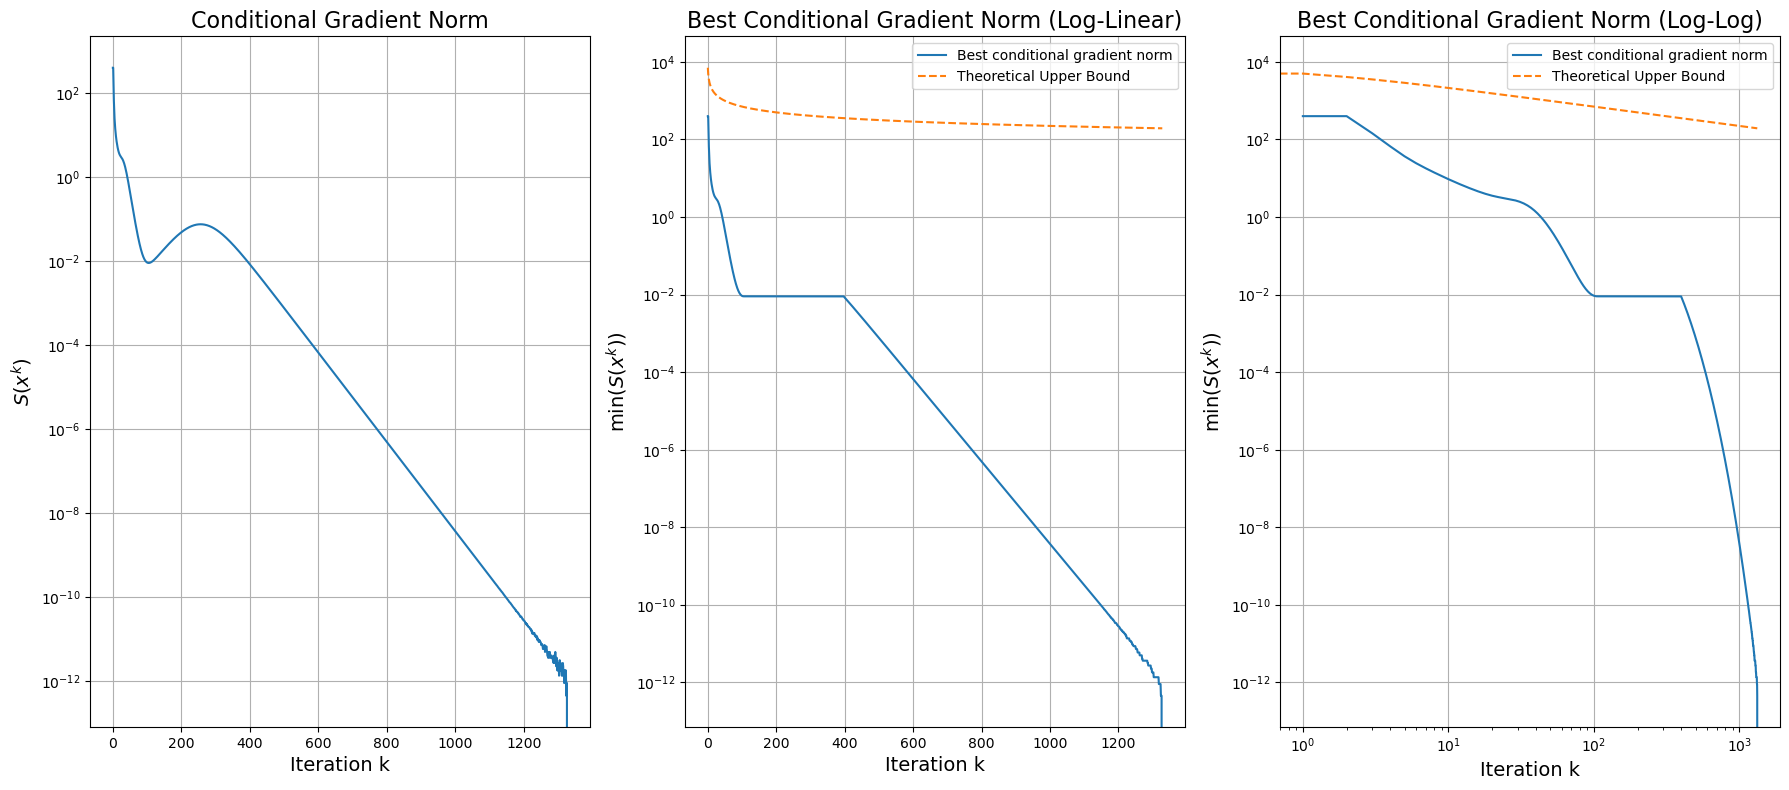

Number of iterations: 1328
Final S(x) value: -4.55e-13


In [4]:
# Plotting
plt.figure(figsize=(18, 8))

# Plot S(x^k) vs k
plt.subplot(131)
plt.semilogy(S_values)
plt.xlabel('Iteration k', fontsize=14)
plt.ylabel('$S(x^k)$', fontsize=14)
plt.title('Conditional Gradient Norm', fontsize=16)
plt.grid(True)


# Plot min S(x^k) vs k (log-linear)
plt.subplot(132)
plt.semilogy(best_S_values, label='Best conditional gradient norm')
plt.xlabel('Iteration k', fontsize=14)
plt.ylabel('min($S(x^k)$)', fontsize=14)
plt.title('Best Conditional Gradient Norm (Log-Linear)', fontsize=16)

# Plot the upper bound
plt.semilogy(upper_bound, linestyle='--', label='Theoretical Upper Bound')
plt.legend()
plt.grid(True)

# Plot min S(x^k) vs k (log-log)
plt.subplot(133)
plt.loglog(range(1, len(best_S_values)+1), best_S_values, label='Best conditional gradient norm')
plt.xlabel('Iteration k', fontsize=14)
plt.ylabel('min($S(x^k)$)', fontsize=14)
plt.title('Best Conditional Gradient Norm (Log-Log)', fontsize=16)


#plot the upper bound
plt.loglog(upper_bound, linestyle='--', label='Theoretical Upper Bound')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Number of iterations: {len(S_values)}")
print(f"Final S(x) value: {S_values[-1]:.2e}")

In [5]:
smallest_eigenvalue = np.min(np.linalg.eigvals(A))
print(f"The smallest eigenvalue of A is: {smallest_eigenvalue}")
text = "A is not positive definite" if smallest_eigenvalue <= 0 else "A is positive definite"
print(text)

The smallest eigenvalue of A is: 4.993161141194476e-05
A is positive definite


## Discussion
The plots for the 'best so far' conditional gradient norm show that the upper bound is indeed satisfied for all $k$. However, we observe that the upper bound given in equation 7, which in the worst case is    
$$
\mathcal{O}\left( \frac{1}{\sqrt{k}}\right),
$$
is quite conservative. The plots suggest a linear convergence rate, which is faster than the worst-case upper bound for general functions. This outcome is not unexpected, as better convergence rates can often be achieved for functions with favorable structures. Beck, for instance, has demonstrated improved convergence rates for convex $f$ and, additionally, for cases where the feasible set exhibits strong convexity.  

In our situation, we have a strongly convex $-f$, implying that $f$ itself is not convex, so these results do not directly apply. Nonetheless, there is some favorable structure to the problem that could be influencing the observed behavior. I will not conduct a thorough analysis of our specific problem or explore why it might yield better rates for the best conditional gradient norm here, as a detailed discussion would go beyond the scope of this bonus problem. However, I will share some ideas and interesting observations below that might provide further if in interested. Note that this additional analysis may not be strictly necessary, but it reflects some extra investigation I conducted out of curiosity, and I thought it would be worth sharing!

**YOU CAN SKIP BELOW IF MY DISCUSSION ABOVE IS ENOUGH BUT YOU CAN OF COURSE STILL READ IF INTERESTED :)**

### Problems with strongly convex feasible sets
One interesting point is that our problem is of the form
$$
\min_{\mathbf{x} \in C} f(\mathbf{x})
$$
where the feasible set is
$$
C = B_{\|\cdot\|_2}[\mathbf{0},1].
$$
In this section we will show that $C = B_{\|\cdot\|}[\mathbf{0},1]$ is a strongy convex set. This is nice because this has some implications of the convergence rates as will be seen in the next section. Furthermore this proof is interesting since the normal way of going with things (just brute forcing the triangle inequality) does not really work, so this is why I provide it! First let us define the strongly convex set:

**Definition (strongly convex set).** A nonempty set $C \subseteq \mathbb{E}$ is called $\sigma$-strongly convex ($\sigma > 0$) if for any $\mathbf{x}, \mathbf{y} \in C$ and $\lambda \in [0, 1]$, the inclusion
$$
\mathcal{B} = B\left[\lambda \mathbf{x} + (1 - \lambda) \mathbf{y}, \frac{\sigma}{2} \lambda (1 - \lambda) \|\mathbf{x} - \mathbf{y}\|^2 \right] \subseteq C
$$
holds. 

To prove that the unit ball in a normed space is strongly convex we need to show that for any $\mathbf{z} \in \mathcal{B}$ we have $\|\mathbf{z}\|\leq 1$. Let $\mathbf{x}, \mathbf{y} \in B_{\|\cdot\|}[\mathbf{0},1]$ and let the center of $\mathcal{B}$ be denoted $\mathbf{s}= \lambda \mathbf{x} + (1 - \lambda) \mathbf{y}$. Lets go about the natural but insufficient way of trying to prove such a thing: we start by using the triangle inequality:
$$
\|\mathbf{z}\| = \|\mathbf{z} - \mathbf{s} + \mathbf{s}\| \leq \|\mathbf{z} - \mathbf{s}\| + \|\mathbf{s}\| \leq \frac{\sigma}{2} \lambda (1 - \lambda) \|\mathbf{x} - \mathbf{y}\|^2 + \|\lambda \mathbf{x} + (1 - \lambda) \mathbf{y}\|.
$$

Next, note that $ \|\mathbf{x} - \mathbf{y}\| $ is bounded by the diameter of the ball $ B_{\|\cdot\|}[\mathbf{0}, 1] $, which is 2. Thus,
$$
\|\mathbf{x} - \mathbf{y}\|^2 \leq 4.
$$

The triangle inequality also gives:
$$
\|\mathbf{s}\|=\|\lambda \mathbf{x} + (1 - \lambda) \mathbf{y}\| \leq \lambda \|\mathbf{x}\| + (1 - \lambda) \|\mathbf{y}\| \leq \lambda \cdot 1 + (1 - \lambda) \cdot 1 = 1.
$$

Therefore, we have:
$$
\|\mathbf{z}\| \leq \frac{\sigma}{2} \underbrace{\lambda (1 - \lambda)}_{\leq 1/4} \cdot4 + 1 = \frac{\sigma}{2} \cdot \frac{1}{4} \cdot 4 + 1 = \frac{\sigma}{2} + 1,
$$

and for this upper bound to be equal to $1$ we need a $\sigma <0$ so we are in trouble! It turns out that the bound $\|\mathbf{s}\|\leq  1$ is to conservative and can be made tighter. Consider instead $\|\mathbf{s}\|^2$:


$$
\begin{align*}
\|\mathbf{s}\|^2 =\|\lambda \mathbf{x} + (1 - \lambda) \mathbf{y}\|^2 &= \left(\lambda \mathbf{x} + (1 - \lambda) \mathbf{y}\right)^\top \left(\lambda \mathbf{x} + (1 - \lambda) \mathbf{y}\right) \\
 &=\lambda^2 \mathbf{x}^\top \mathbf{x} + \lambda (1 - \lambda) \mathbf{x}^\top \mathbf{y}  + \lambda (1 - \lambda) \mathbf{y}^\top \mathbf{x} + (1 - \lambda)^2 \mathbf{y}^\top \mathbf{y} \\
 & = \lambda^2 \|\mathbf{x}\|^2 + (1 - \lambda)^2 \|\mathbf{y}\|^2 + 2 \lambda (1 - \lambda) \mathbf{x}^\top \mathbf{y}
\end{align*}
$$

Now, using the well-known property:
$$
\|\mathbf{x} - \mathbf{y}\|^2 = \|\mathbf{x}\|^2 + \|\mathbf{y}\|^2 - 2 \mathbf{x}^\top \mathbf{y} \implies 2 \mathbf{x}^\top \mathbf{y} = \|\mathbf{x}\|^2 + \|\mathbf{y}\|^2 - \|\mathbf{x} - \mathbf{y}\|^2
$$
and substituting we get:
$$
\begin{align*}
\|\mathbf{s}\|^2 &= \lambda^2 \|\mathbf{x}\|^2 + (1 - \lambda)^2 \|\mathbf{y}\|^2 + \lambda (1 - \lambda) \left(\|\mathbf{x}\|^2 + \|\mathbf{y}\|^2 - \|\mathbf{x} - \mathbf{y}\|^2 \right) \\
& = \lambda \|\mathbf{x}\|^2 - (1 - \lambda) \|\mathbf{y}\|^2 + \lambda (1 - \lambda) \|\mathbf{x} - \mathbf{y}\|^2 \\
& \leq \lambda \cdot 1 - (1 - \lambda) \cdot 1 + \lambda (1 - \lambda) \|\mathbf{x} - \mathbf{y}\|^2\\
& = 1 -  \lambda (1 - \lambda) \|\mathbf{x} - \mathbf{y}\|^2.
\end{align*}
$$

Simply taking the square root yields
$$
\|\mathbf{s}\| \leq \sqrt{1 -  \lambda (1 - \lambda) \|\mathbf{x} - \mathbf{y}\|^2}.
$$

Note that this indeed a tighter bound than just $\|\mathbf{s}\| \leq 1$! Going back to the original idea we now have
$$
\|\mathbf{z}\| = \|\mathbf{z} - \mathbf{s} + \mathbf{s}\| \leq \|\mathbf{z} - \mathbf{s}\| + \|\mathbf{s}\| \leq \frac{\sigma}{2} \lambda (1 - \lambda) \|\mathbf{x} - \mathbf{y}\|^2 + \sqrt{1 -  \lambda (1 - \lambda) \|\mathbf{x} - \mathbf{y}\|^2},
$$
and letting $t=\lambda (1 - \lambda) \|\mathbf{x} - \mathbf{y}\|^2$ we have

$$
\|\mathbf{z}\| \leq \frac{\sigma}{2} t + \sqrt{1 -  t}.
$$

It is simple to check with highschool calculus that the function $h(t) = \frac{1}{2} t + \sqrt{1 -  t}$ has a global maximum of $1$. Therefore $\|\mathbf{z}\| \leq 1$ if $\sigma=1$ implying that $\mathcal{B}$ is a $\sigma$ -strongly convex set with $\sigma = 1$.
### Convergence rate of the conditional gradient norm with strongly convex feasible sets

In theorem 13.27 Beck shows that for problems of the form
$$
\min_{\mathbf{x} \in C} f(\mathbf{x})
$$

with a strongly convex feasible set $C$ added that $f$ is convex and some other assumptions (see assumptions 13.25) the conditional gradient method enjoys a linear convergence rate **in function values**. Now, a rate on the values of the conditional gradient norm is not given, but I believe that froom the proof of theorem 13.27 a linear rate on the conditional rate can also be found. Equation 13.49 states (for some specific lambda we omit the exact value)

$$
f(\mathbf{x}^k) - f(\mathbf{x}^{k+1}) \geq \lambda S(\mathbf{x}^k) \iff S(\mathbf{x}^k) \leq \frac{1}{\lambda} (f(\mathbf{x}^k) - f(\mathbf{x}^{k+1})).
$$

Since  $f(\mathbf{x}^{k+1}) \geq f_{\text{opt}}$ we also have:

$$
S(\mathbf{x}^k) \leq \frac{1}{\lambda} (f(\mathbf{x}^k) - f(\mathbf{x}^{k+1})) \leq \frac{1}{\lambda} (f(\mathbf{x}^k) - f_{\text{opt}}),
$$

With the linear rate of theorem 13.27 $f(\mathbf{x}^k) - f_{\text{opt}} \leq (1 - \lambda)^k (f(\mathbf{x}^0) - f_{\text{opt}})$ we finally get
$$
\min_{n=0,1,\ldots,k} S(\mathbf{x}^n) \leq S(\mathbf{x}^k) \leq \frac{1}{\lambda} (1 - \lambda)^k (f(\mathbf{x}^0) - f_{\text{opt}}),
$$
meaning a linear rate of the conditional gradient norm as well!

### Final Discussion
We have established that our problem indeed has a $\sigma$-strongly convex feasible set. Under this assumption, a convex function $f$ (along with some additional conditions, see 13.25) would result in a linear convergence rate for the conditional gradient norms in the algorithm. However, our $f$ **is not convex**; in fact, $-f$ is strongly convex, so these results do not theoretically apply to our case. Nevertheless, this indicates that our problem has a more favorable structure than the general setup described by Beck, which leads to the slower worst-case rate of $\mathcal{O}(1/\sqrt{k})$. In contrast, we observe a linear convergence rate!